In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as spop

In [141]:
df = pd.read_csv('part 2. input.csv', header=None)
data = pd.DataFrame()
data[0] = df[0]

In [142]:
data[0]

0      5.106368
1      4.132983
2      3.997726
3      3.997749
4      7.098298
         ...   
495    3.546340
496    3.570249
497    5.333346
498    7.033640
499    7.550757
Name: 0, Length: 500, dtype: float64

In [143]:
data['rank']=(data[0].rank(method='first'))/(len(data))
data=data.sort_values(by='rank').reset_index(drop=True)
data[0]

0       1.099083
1       1.452437
2       1.825481
3       1.898599
4       1.934457
         ...    
495     8.608691
496     8.711368
497     9.064404
498     9.332110
499    12.838062
Name: 0, Length: 500, dtype: float64

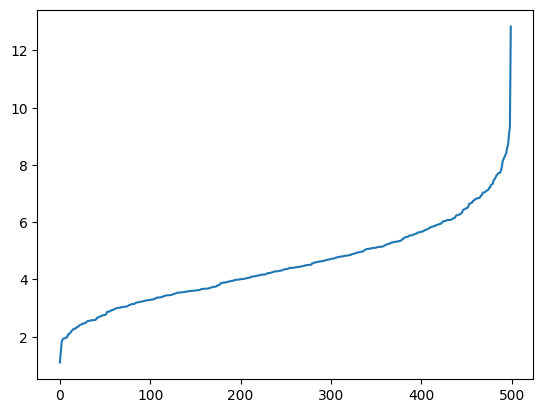

In [144]:
#plt.plot(data[0])

In [145]:
mean = np.average(data[0])
var = (np.std(data[0]))**2
print(mean, var)

4.516165076902346 2.1714300417278136


In [146]:
def fun(k):
    return -np.sum(np.log(((1/(sp.special.gamma(k[0])*(k[1]**k[0]))*(data[0]**(k[0]-1))*np.exp(-data[0]/k[1])))))

In [147]:
res = spop.minimize(fun, [mean, var], method='SLSQP', bounds=((0.000001, None), (0.000001, None)))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [148]:
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 879.4929659680913
       x: [ 9.622e+00  4.693e-01]
     nit: 23
     jac: [-1.793e-03 -1.778e-02]
    nfev: 79
    njev: 23


In [149]:
mean = res.x[0]
var = res.x[1]

9.622405200123358 0.4693376635129099


In [150]:
data['gamma'] = sps.gamma.cdf (data[0], a= mean , scale=var)
data['gamma']

0      0.000293
1      0.002207
2      0.009948
3      0.012681
4      0.014210
         ...   
495    0.990432
496    0.991552
497    0.994534
498    0.996100
499    0.999970
Name: gamma, Length: 500, dtype: float64

In [151]:
KS_array = abs(data['rank']-data['gamma'])
KS = max(KS_array)

KS_p = np.exp(-KS**2*len(data))

0      0.000293
1      0.002207
2      0.009948
3      0.012681
4      0.014210
         ...   
495    0.990432
496    0.991552
497    0.994534
498    0.996100
499    0.999970
Name: gamma, Length: 500, dtype: float64
0.021881103474203634 0.7871067920799683


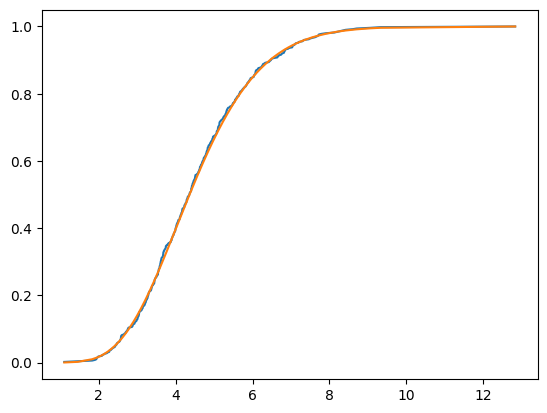

In [139]:
#plt.figure('gamma')
#plt.plot(data[0], data['rank'])
#plt.plot(data[0], data['gamma'])
#plt.show()
print(mean, var)